In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string, os
import tensorflow as tf

# keras module for building LSTM
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'myfolder')
drive.mount(MOUNTPOINT)


Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/lyrics-data.csv", encoding ="utf-8")

In [4]:
df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [5]:
df = df.drop(["ALink", "SName", "SLink"], axis = 1)

In [6]:
df = df[df["language"]=="en"]

In [7]:
df = df[:1000]

In [8]:
df.head()

,Lyric,language
69,I feel so unsure\nAs I take your hand and lead...,en
86,"Don't let them fool, ya\nOr even try to school...",en
88,"Baby, let's cruise, away from here\nDon't be c...",en
111,"Know it sounds funny\nBut, I just can't stand ...",en
140,You've got that look again\nThe one I hoped I ...,en


In [9]:
df['Number_of_words'] = df["Lyric"].apply(lambda x : len(str(x).split()))

<ipython-input-10-0177693ace85>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Number_of_words"] , kde = False, color = "red", bins = 200)


Text(0.5, 1.0, 'Frequence distribution of words for each extracted text')

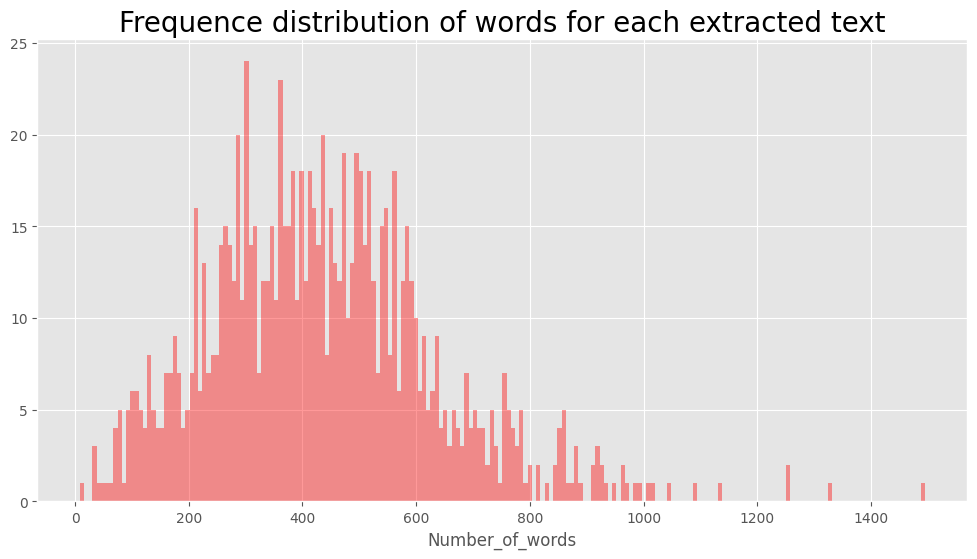

In [10]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize = (12,6))
sns.distplot(df["Number_of_words"] , kde = False, color = "red", bins = 200)
plt.title("Frequence distribution of words for each extracted text", size = 20)


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Lyric"].astype(str).str.lower())



In [12]:
total_words = len(tokenizer.word_index)+1
tokenized_sentences = tokenizer.texts_to_sequences(df["Lyric"].astype(str))


In [13]:
tokenized_sentences[0]

[1,
 84,
 28,
 8172,
 126,
 1,
 70,
 14,
 296,
 9,
 530,
 2,
 5,
 3,
 261,
 333,
 126,
 3,
 302,
 4278,
 212,
 10,
 14,
 190,
 1670,
 5,
 165,
 6,
 3795,
 2381,
 9,
 25,
 517,
 1274,
 8173,
 11,
 78,
 105,
 261,
 178,
 1671,
 889,
 76,
 23,
 37,
 1392,
 481,
 39,
 382,
 5,
 587,
 1,
 18,
 63,
 65,
 6,
 652,
 1347,
 861,
 136,
 169,
 5,
 2135,
 6,
 329,
 9,
 970,
 3,
 696,
 13,
 143,
 96,
 1602,
 28,
 11,
 78,
 105,
 261,
 178,
 3,
 74,
 1,
 2136,
 31,
 2,
 62,
 41,
 78,
 4279,
 3,
 8174,
 6108,
 29,
 6,
 108,
 329,
 5,
 3,
 145,
 9,
 165,
 6109,
 26,
 661,
 215,
 37,
 2873,
 10,
 3,
 727,
 424,
 26,
 25,
 196,
 187,
 11,
 78,
 105,
 261,
 178,
 1671,
 889,
 76,
 23,
 37,
 1392,
 481,
 39,
 382,
 5,
 587,
 1,
 18,
 63,
 65,
 6,
 652,
 1347,
 861,
 136,
 169,
 5,
 2135,
 6,
 329,
 9,
 970,
 30,
 696,
 13,
 143,
 96,
 1602,
 28,
 11,
 78,
 105,
 261,
 178,
 3,
 74,
 1,
 2136,
 31,
 2,
 78,
 265,
 14,
 21,
 144,
 3,
 302,
 715,
 28,
 1459,
 1,
 346,
 13,
 16,
 128,
 344,
 30,
 1058,
 410,


In [14]:
input_sequences = list()
for i in tokenized_sentences:
  for t in range(1, len(i)):
    n_gram_sequences = i[:t+1]
    input_sequences.append(n_gram_sequences)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len,
                                         padding = 'pre'))

In [15]:
input_sequences[:10]

array([[   0,    0,    0, ...,    0,    1,   84],
       [   0,    0,    0, ...,    1,   84,   28],
       [   0,    0,    0, ...,   84,   28, 8172],
       ...,
       [   0,    0,    0, ...,   70,   14,  296],
       [   0,    0,    0, ...,   14,  296,    9],
       [   0,    0,    0, ...,  296,    9,  530]], dtype=int32)

In [16]:
X, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
#Model

model = Sequential()
model.add(Embedding(total_words, 40, input_length= max_sequence_len-1))
model.add(Bidirectional(LSTM(250)))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam",
              metrics = ["accuracy"])
earlystop = EarlyStopping(monitor = "loss", min_delta = 0, patience = 3, verbose = 0, mode = "auto")
history = model.fit(X, y, epochs = 1, verbose = 1, callbacks = [earlystop])

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
def complete_song(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.text_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen= max_sequence_len-1,
                               padding = 'pre')

    predicted = model.predict_classes(token_list, verbose=0)

    output_word = ""
    for word, index in tokenizer.word_index.items()
      if index == predicted:
        output_word = word
        break
    seed_text += " "+output_word

  return seed_text




In [ ]:
complete_song("the sky is blue", 40)

In [ ]:
from tensorflow.keras.models import load_model
model.save('song_lyrics_generator.h5')